In [55]:
import requests
import json

In [56]:
# puxando uma informações com o .get()
cotacoes = requests.get('https://economia.awesomeapi.com.br/json/all')

# transformando o request (que volta como um parâmetro json) em um dicionário do python
cotacoes_dict = cotacoes.json()
print(cotacoes_dict)

{'USD': {'code': 'USD', 'codein': 'BRL', 'name': 'Dólar Americano/Real Brasileiro', 'high': '5.2385', 'low': '5.1652', 'varBid': '0.0338', 'pctChange': '0.65', 'bid': '5.2074', 'ask': '5.2084', 'timestamp': '1674250201', 'create_date': '2023-01-20 18:30:01'}, 'USDT': {'code': 'USD', 'codein': 'BRLT', 'name': 'Dólar Americano/Real Brasileiro Turismo', 'high': '5.255', 'low': '5.17', 'varBid': '0.03', 'pctChange': '0.58', 'bid': '5.07', 'ask': '5.38', 'timestamp': '1674243120', 'create_date': '2023-01-20 16:32:00'}, 'CAD': {'code': 'CAD', 'codein': 'BRL', 'name': 'Dólar Canadense/Real Brasileiro', 'high': '3.8978', 'low': '3.8332', 'varBid': '0.0491', 'pctChange': '1.28', 'bid': '3.8911', 'ask': '3.893', 'timestamp': '1674251996', 'create_date': '2023-01-20 18:59:56'}, 'GBP': {'code': 'GBP', 'codein': 'BRL', 'name': 'Libra Esterlina/Real Brasileiro', 'high': '6.4676', 'low': '6.381', 'varBid': '0.0457', 'pctChange': '0.71', 'bid': '6.4535', 'ask': '6.4584', 'timestamp': '1674251997', 'cr

In [57]:
print("Dólar: {}".format(cotacoes_dict['USD']['bid']))
print("Euro: {}".format(cotacoes_dict['EUR']['bid']))
print("Bitcoin: {}".format(cotacoes_dict['BTC']['bid']))

Dólar: 5.2074
Euro: 5.6526
Bitcoin: 119.428


In [58]:
# pegando a cotação do Dólar dos últimos 30 dias 
cotacoes_dias = requests.get('https://economia.awesomeapi.com.br/json/USD-BRL/30')

cotacoes_dolar_30d = cotacoes_dias.json()
print(cotacoes_dolar_30d[0])

{'code': 'USD', 'codein': 'BRL', 'name': 'Dólar Americano/Real Brasileiro', 'high': '5.2385', 'low': '5.1652', 'varBid': '0.0338', 'pctChange': '0.65', 'bid': '5.2074', 'ask': '5.2084', 'timestamp': '1674250201', 'create_date': '2023-01-20 18:30:01'}


In [59]:
# vamos pegar a informação do bid de cada indice do dicionário
# transformando o valor da cotação em float

lista_cotacoes_USD = [float(item['bid']) for item in cotacoes_dolar_30d]
print(lista_cotacoes_USD)

[5.2074, 5.2088, 5.2018, 5.2007, 5.2024, 5.2044, 5.2053, 5.2063, 5.2067, 5.2078, 5.2085, 5.2088, 5.2088, 5.2077, 5.2082, 5.2074, 5.2058, 5.2058, 5.2063, 5.2047, 5.2077, 5.2062, 5.2088, 5.2078, 5.2088, 5.2074, 5.2072, 5.2078, 5.2062, 5.2042]


In [60]:
lista_cotacoes_USD = [float(item['bid']) for item in cotacoes_dolar_30d]

In [61]:
# exibindo no gráfico

import matplotlib.pyplot as plt

lista_cotacoes_USD.reverse()

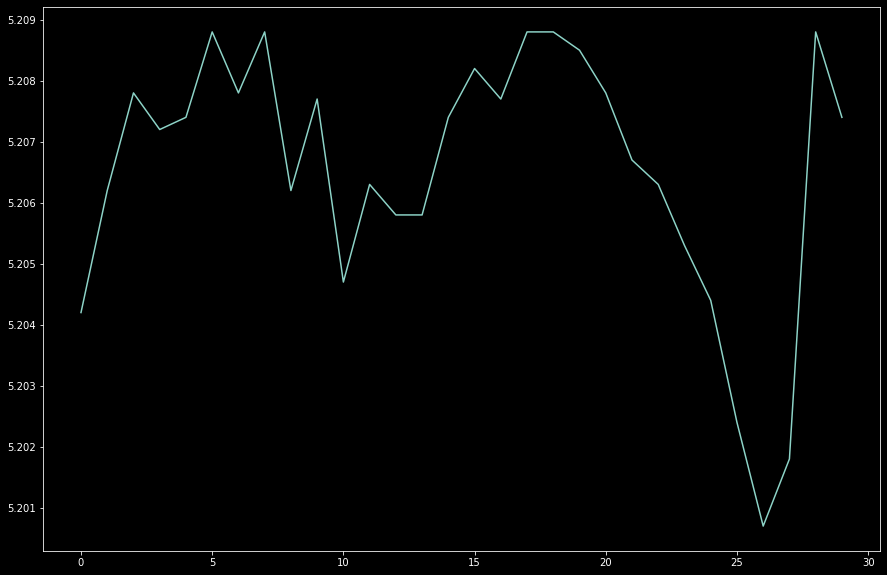

In [62]:
plt.figure(figsize=(15,10))

plt.plot(lista_cotacoes_USD)
#plt.plot(lista_cotacoes_EUR, label = 'Euro')
#plt.plot(lista_cotacoes_BTC, label = 'Bitcoin')

plt.show()

### Informações Econômicas

In [63]:
from chave import chave_api
import requests
import pandas as pd
from io import StringIO
import pprint

In [64]:
# replace the "demo" apikey below with your own key from https://www.alphavantage.co/support/#api-key

url = f'https://www.alphavantage.co/query?function=TIME_SERIES_WEEKLY_ADJUSTED&symbol=ITSA4.SA&apikey={chave_api}&datatype=csv'
r = requests.get(url)
#data = r.json()
#print(data)


#print(r.text) # devolve a API em forma de texto separado por vírgula
table = pd.read_csv(StringIO(r.text))
display(table)

,timestamp,open,high,low,close,adjusted close,volume,dividend amount
0,2023-01-20,8.62,8.76,8.40,8.58,8.5800,81954000,0.0
1,2023-01-13,8.45,8.81,8.41,8.63,8.6300,103352200,0.0
2,2023-01-06,8.44,8.51,8.12,8.48,8.4800,97969900,0.0
3,2022-12-29,8.57,8.65,8.31,8.51,8.5100,45594500,0.0
4,2022-12-23,8.06,8.63,8.05,8.58,8.5800,92278800,0.0
...,...,...,...,...,...,...,...,...
943,2005-02-11,5.07,5.10,4.90,5.02,0.6980,5258210,0.0
944,2005-02-04,4.44,5.07,4.44,5.07,0.7050,15235607,0.0
945,2005-01-28,4.31,4.52,4.20,4.40,0.6118,12935932,0.0
946,2005-01-21,4.50,4.56,4.35,4.42,0.6146,12732588,0.0


In [65]:
acoes = ['ITUB4', 'ABEV3']

compilada = pd.DataFrame()

for acao in acoes:
    url = f'https://www.alphavantage.co/query?function=GLOBAL_QUOTE&symbol={acao}&apikey={chave_api}&datatype=csv'
    r = requests.get(url)
    table = pd.read_csv(StringIO(r.text))
    lista_tabelas = [ compilada, table ]
    compilada = pd.concat(lista_tabelas)

display(compilada)


,{}


### Encontrando um Endpoint

In [66]:
url = f'https://www.alphavantage.co/query?function=SYMBOL_SEARCH&keywords=amazon&apikey={chave_api}&datatype=csv'
s = requests.get(url)

tabela = pd.read_csv(StringIO(s.text))
display(tabela)

,symbol,name,type,region,marketOpen,marketClose,timezone,currency,matchScore
0,AMZN,Amazon.com Inc,Equity,United States,09:30,16:00,UTC-04,USD,0.8000
1,AMZ.DEX,Amazon.com Inc,Equity,XETRA,08:00,20:00,UTC+02,EUR,0.6000
2,AMZ.FRK,Amazon.com Inc,Equity,Frankfurt,08:00,20:00,UTC+02,EUR,0.6000
3,AMZO34.SAO,Amazon.com Inc,Equity,Brazil/Sao Paolo,10:00,17:30,UTC-03,BRL,0.6000
4,0R1O.LON,Amazon.com Inc.,Equity,United Kingdom,08:00,16:30,UTC+01,USD,0.5714
5,AMZ1.FRK,AMAZON.COM INC.CDR DL-01,Equity,Frankfurt,08:00,20:00,UTC+02,EUR,0.5000
6,AZFL,Amazonas Florestal Ltd,Equity,United States,09:30,16:00,UTC-04,USD,0.4286


In [67]:
data = s.json()
pprint.pprint(data)

JSONDecodeError: Expecting value: line 1 column 1 (char 0)

### API DO IBGE

https://servicodados.ibge.gov.br/api/docs

In [68]:
url = f'https://servicodados.ibge.gov.br/api/v3/agregados/8418/periodos/2019/variaveis/12747?localidades=N2[all]'